In [1]:
import numpy as np
import numdifftools as nd

from derivkit.kit import DerivativeKit
from derivkit.derivative_plotter import DerivativePlotter


In [2]:
# Example 1: Gaussian-modulated sine
def f1(x):
    return np.exp(-x**2) * np.sin(5 * x)

# Example 2: High-degree polynomial
def f2(x):
    return x**5 - 2*x**3 + x

# Example 3: Simple sine
def f3(x):
    return np.sin(x)

functions = [f1, f2, f3]
names = ["exp(-x^2) * sin(5x)", "x^5 - 2x^3 + x", "sin(x)"]


In [3]:
x0 = 0.5
orders = [1, 2, 3]

for f, name in zip(functions, names):
    print(f"\nFunction: {name} at x = {x0}")
    for n in orders:
        kit = DerivativeKit(f, x0, derivative_order=n)
        stencil_val = kit.finite.compute()
        adaptive_val = kit.adaptive.compute()
        nd_val = nd.Derivative(f, n=n)(x0)

        print(f"  Order {n} Derivative:")
        print(f"    Stencil:   {stencil_val:.6f}")
        print(f"    Adaptive:  {adaptive_val:.6f}")
        print(f"    NumDiff:   {nd_val:.6f}")



Function: exp(-x^2) * sin(5x) at x = 0.5
  Order 1 Derivative:
    Stencil:   -3.585745
    Adaptive:  -3.567154
    NumDiff:   -3.585747
  Order 2 Derivative:
    Stencil:   -5.879043
    Adaptive:  -5.880812
    NumDiff:   -5.879042
  Order 3 Derivative:
    Stencil:   124.517587
    Adaptive:  124.004443
    NumDiff:   124.637624

Function: x^5 - 2x^3 + x at x = 0.5
  Order 1 Derivative:
    Stencil:   -0.187500
    Adaptive:  -0.187049
    NumDiff:   -0.187500
  Order 2 Derivative:
    Stencil:   -3.500000
    Adaptive:  -3.491192
    NumDiff:   -3.500000
  Order 3 Derivative:
    Stencil:   3.003000
    Adaptive:  3.015858
    NumDiff:   3.000000

Function: sin(x) at x = 0.5
  Order 1 Derivative:
    Stencil:   0.877583
    Adaptive:  0.877451
    NumDiff:   0.877583
  Order 2 Derivative:
    Stencil:   -0.479426
    Adaptive:  -0.479355
    NumDiff:   -0.479426
  Order 3 Derivative:
    Stencil:   -0.877561
    Adaptive:  -0.877467
    NumDiff:   -0.877583


In [5]:
# Visual demo of noisy fit on f1
plotter = DerivativePlotter(f1, x_center=0.5, plot_dir="plots")


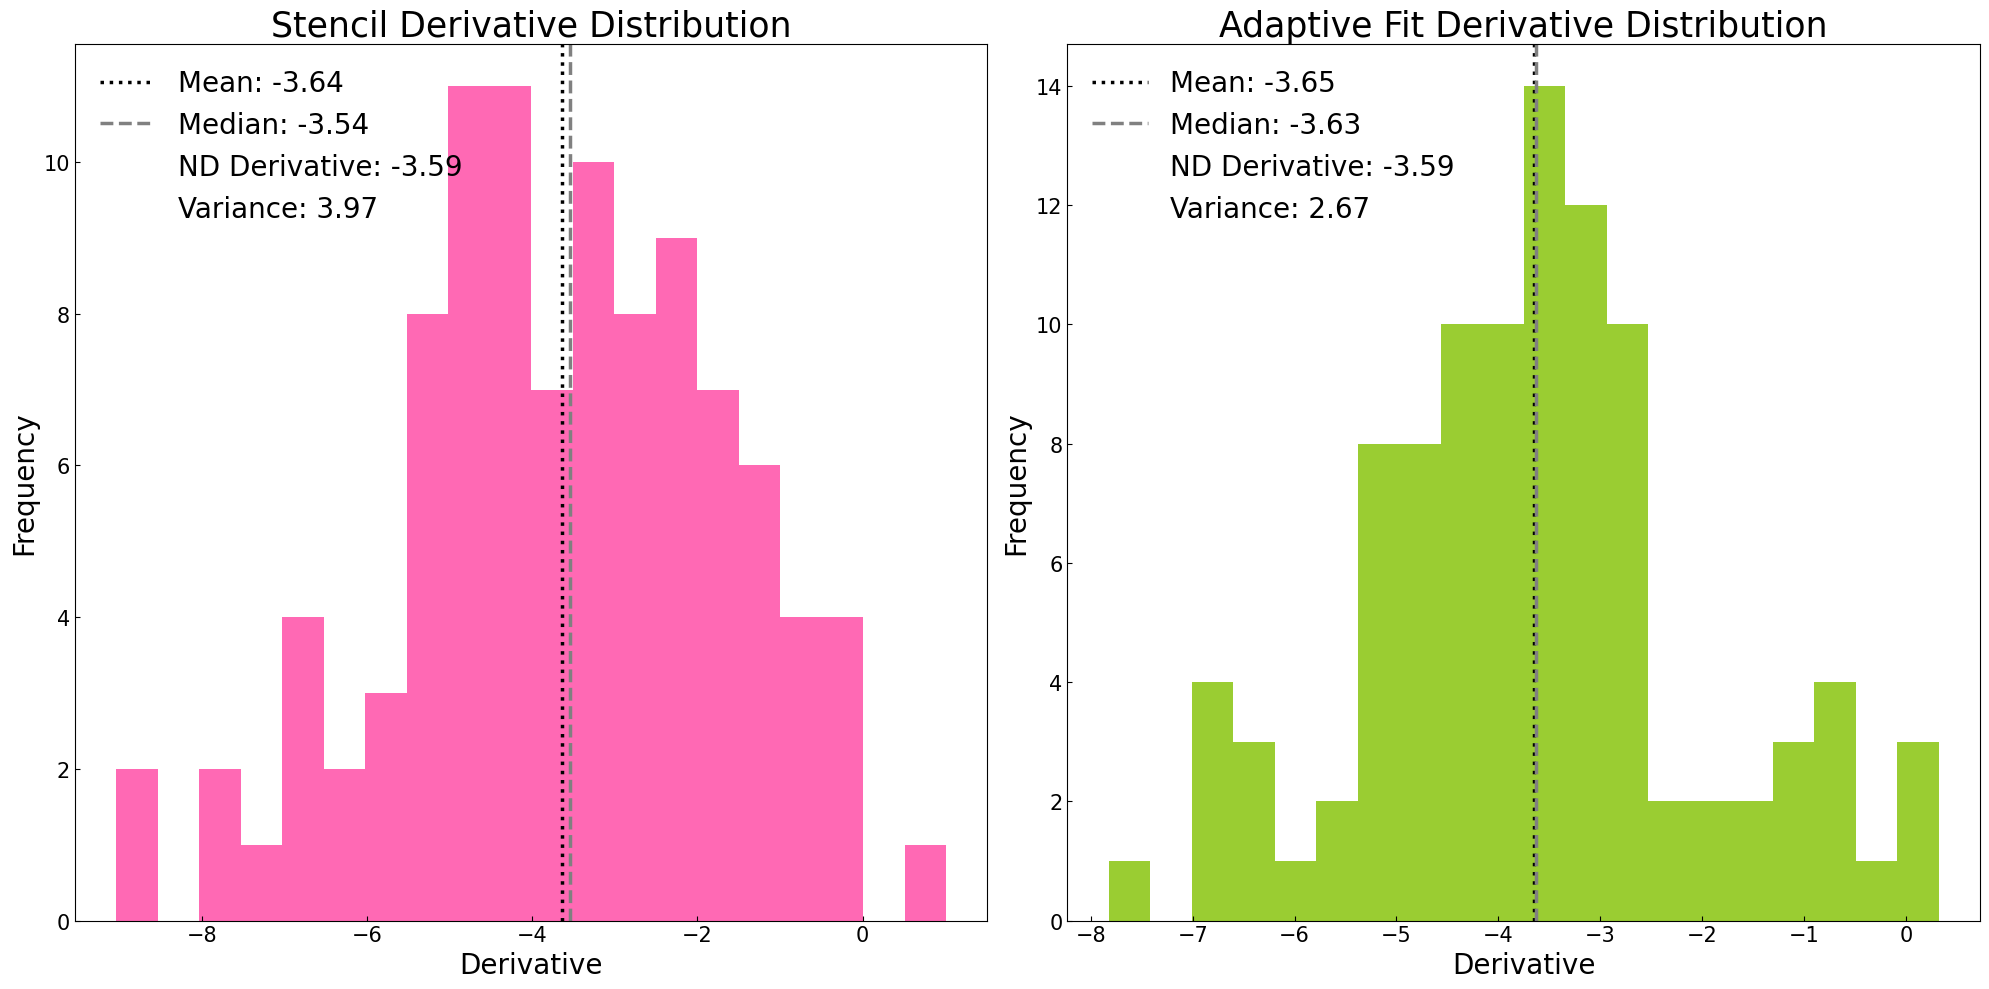

In [6]:
# Compare histograms across methods with noise
stencil_vals, adaptive_vals = [], []

for _ in range(100):
    noisy_f = lambda x: f1(x) + np.random.normal(0, 0.02)
    kit = DerivativeKit(noisy_f, 0.5, derivative_order=1)
    stencil_vals.append(kit.finite.compute())
    adaptive_vals.append(kit.adaptive.compute())

plotter.plot_histograms(stencil_vals, adaptive_vals)
